# Análisis de los datos históricos de existencias/ingresos y creación de un cuadro de mando

In [2]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [3]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Extracción de datos de acciones de Tesla utilizando yfinance 

In [8]:
stock_data=yf.Ticker('TSLA')

In [9]:
tesla_data=stock_data.history(period='max')

In [21]:
tesla_data.reset_index(inplace=True)
tesla_data.head(10)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
5,5,2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
6,6,2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
7,7,2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
8,8,2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0
9,9,2010-07-13 00:00:00-04:00,1.159333,1.242667,1.126667,1.209333,40201500,0.0,0.0


## Extracción de datos de ingresos de Tesla utilizando Webscraping 

In [11]:
URL='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(URL).text

In [12]:
soup=BeautifulSoup(html_data,'html.parser')

In [13]:
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find_all('tbody')[1].find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date':[date],'Revenue':[revenue]})],ignore_index=True)

In [14]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [15]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [16]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Extracción de datos de acciones de GameStop utilizando yfinance

In [17]:
gstock_data=yf.Ticker('GME')

In [18]:
gme_data=gstock_data.history(period='max')

In [22]:
gme_data.reset_index(inplace=True)
gme_data.head(10)

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
5,5,5,2002-02-21 00:00:00-05:00,1.656318,1.670626,1.641169,1.658001,6976800,0.0,0.0
6,6,6,2002-02-22 00:00:00-05:00,1.670626,1.670626,1.615920,1.628544,3525600,0.0,0.0
7,7,7,2002-02-25 00:00:00-05:00,1.624337,1.653794,1.605821,1.641169,3453600,0.0,0.0
8,8,8,2002-02-26 00:00:00-05:00,1.632753,1.658002,1.606663,1.641169,2761600,0.0,0.0
9,9,9,2002-02-27 00:00:00-05:00,1.628545,1.629386,1.599088,1.611712,4091200,0.0,0.0


## Extracción de datos de ingresos de GameStop utilizando Webscraping

In [23]:
URL2='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2=requests.get(URL2).text

In [24]:
soup2=BeautifulSoup(html_data_2,'html.parser')

In [25]:
gme_revenue=pd.DataFrame(columns=['Date','Revenue'])
for row in soup2.find_all('tbody')[1].find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({'Date':[date],'Revenue':[revenue]})],ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [26]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Tablero de acciones e ingresos de Tesla 

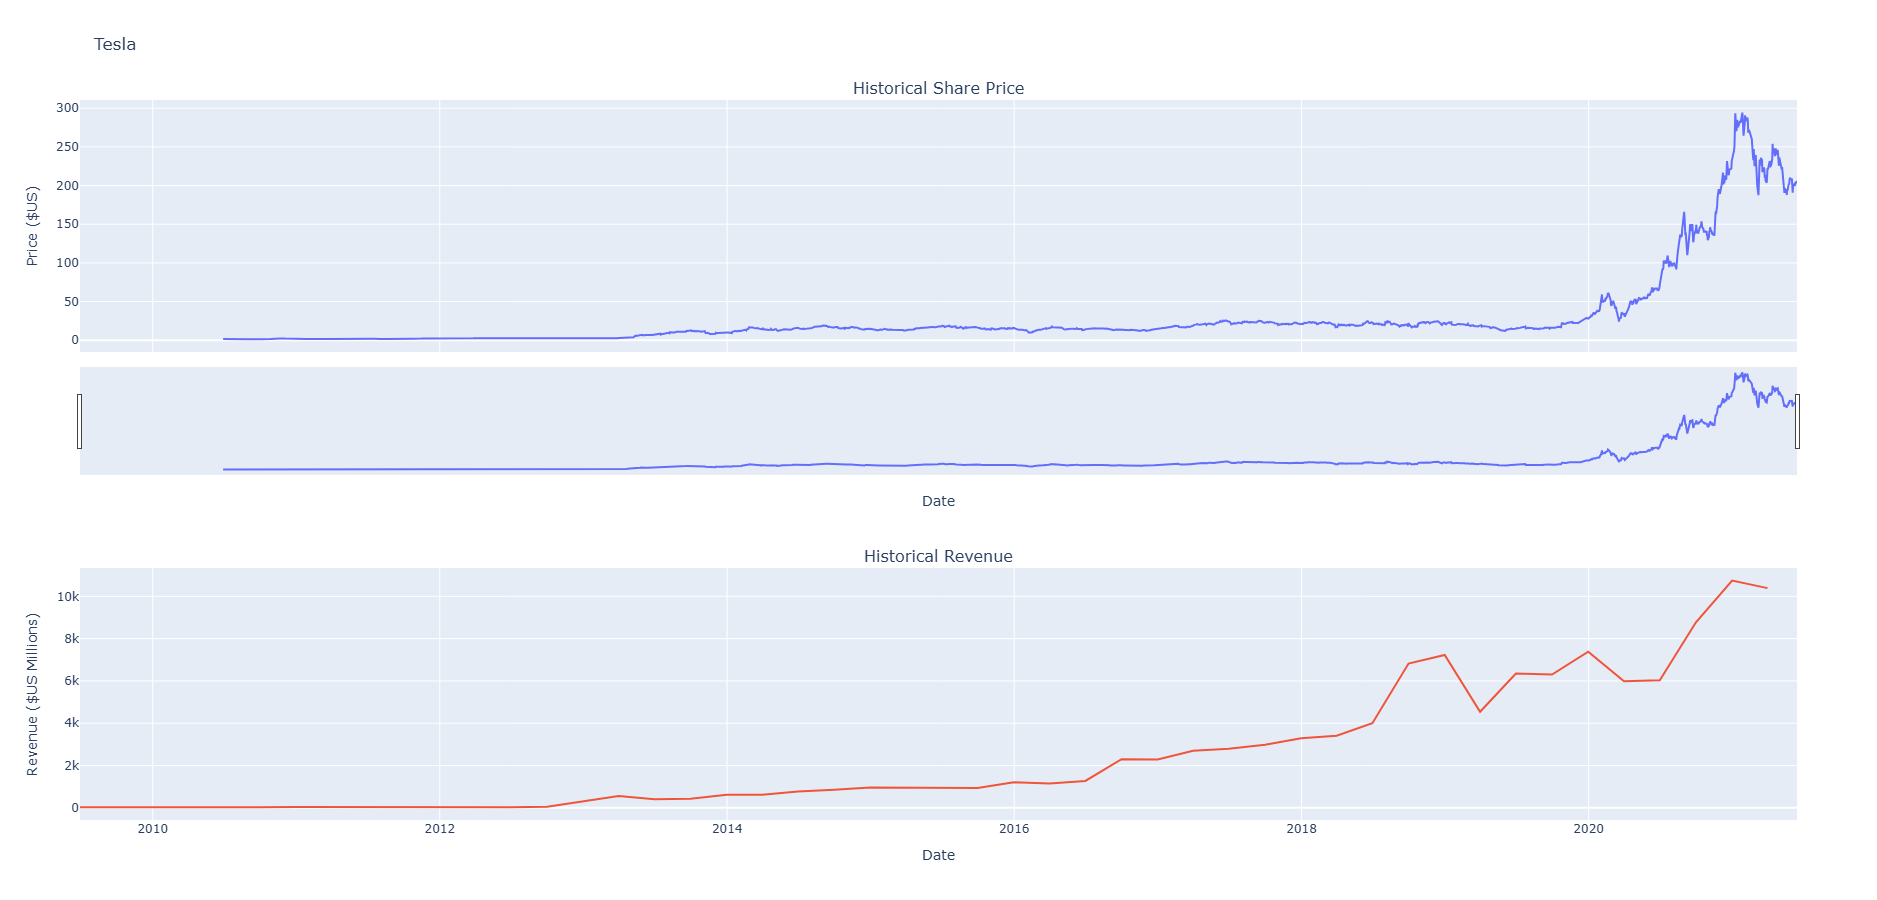

In [29]:
make_graph(tesla_data,tesla_revenue,'Tesla')

## Cuadro de mando de acciones e ingresos de GameStop

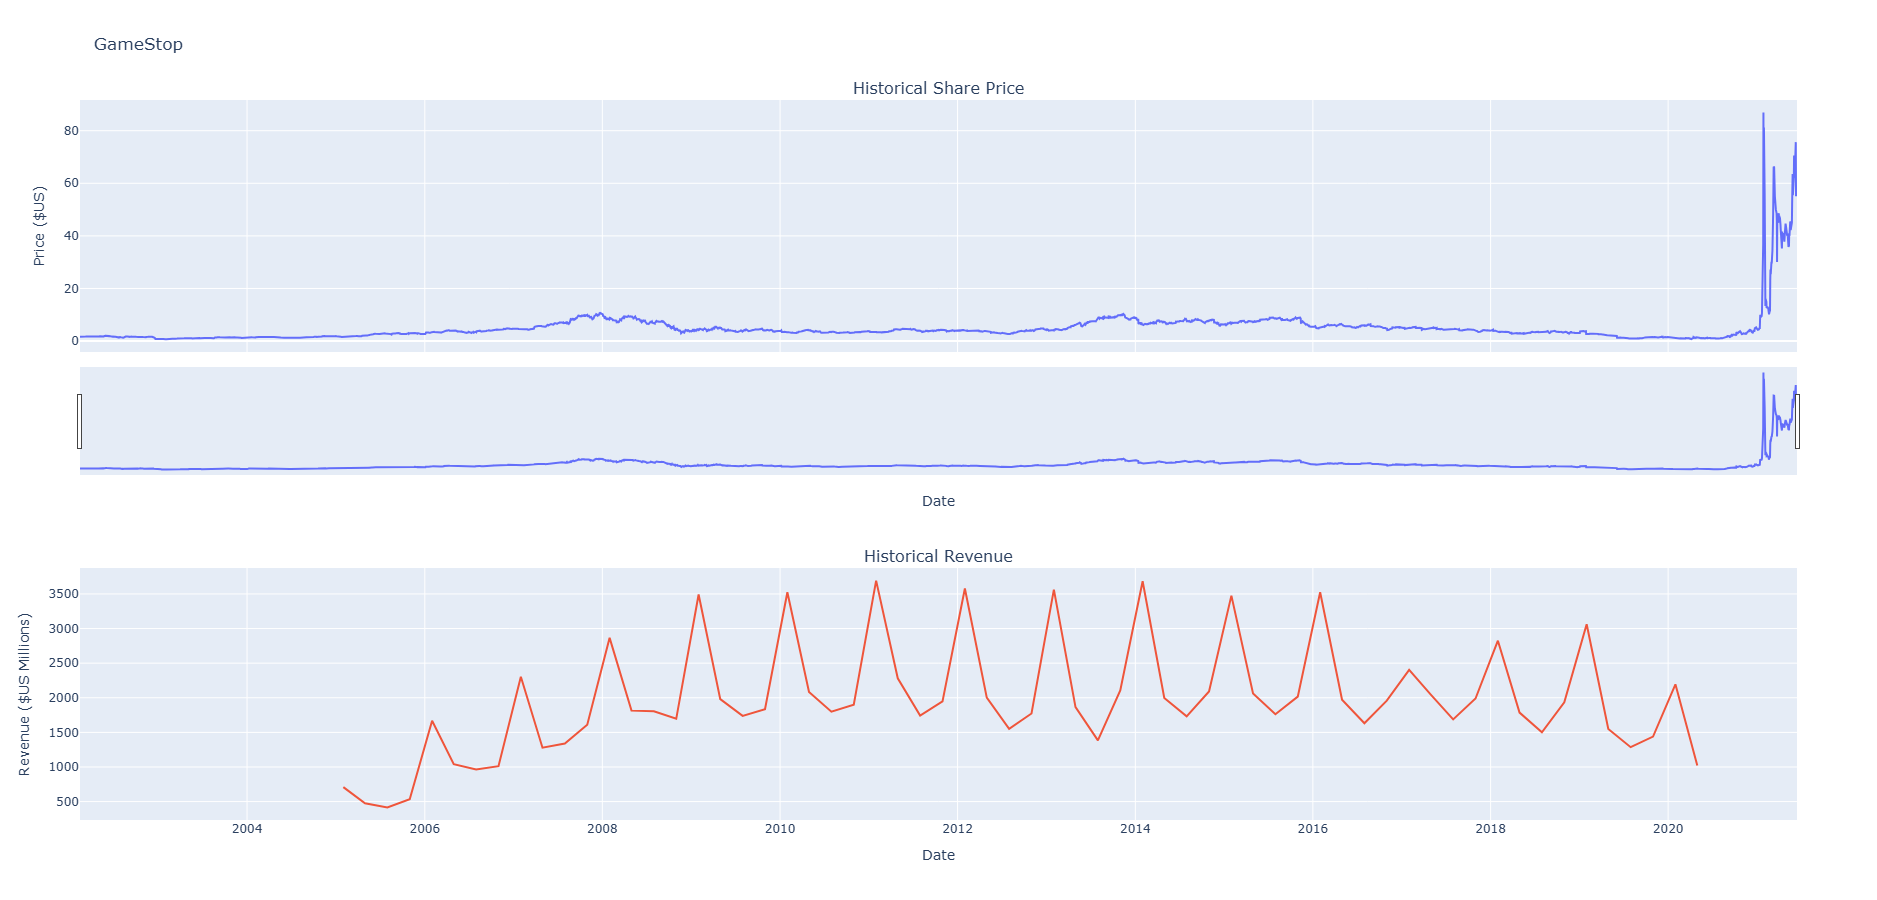

In [30]:
make_graph(gme_data, gme_revenue, 'GameStop')

## Autor

[Yearit Susana Lopez Luque]